### Q: What aspects of a listing predict the price? In other words if I have a listing what can I do to increase my chances of renting at a higher price? 

First, let's read in the data and necessary libraries.

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mypy import print_side_by_side
from mypy import display_side_by_side
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [397]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# b_cal = pd.read_csv('boston_calendar.csv')
# s_cal = pd.read_csv('seatle_calendar.csv')
b_list = pd.read_csv('boston_listings.csv')
s_list = pd.read_csv('seatle_listings.csv')
# b_rev = pd.read_csv('boston_reviews.csv')
# s_rev = pd.read_csv('seatle_reviews.csv')

b_cal_1 = pd.read_csv('b_cal_1.csv', index_col = 0)
s_cal_1 = pd.read_csv('s_cal_1.csv', index_col = 0)
# b_list_d= pd.read_csv('b_list_d.csv', index_col = 0)
# s_list_d= pd.read_csv('s_list_d.csv', index_col = 0)
b_list_d = pd.read_csv('b_list_d.csv', index_col = 0)
s_list_d = pd.read_csv('s_list_d.csv', index_col = 0)

 _______________________________________________________________________________________________________________________

### Task2: Data Understanding

let's take a look at price 

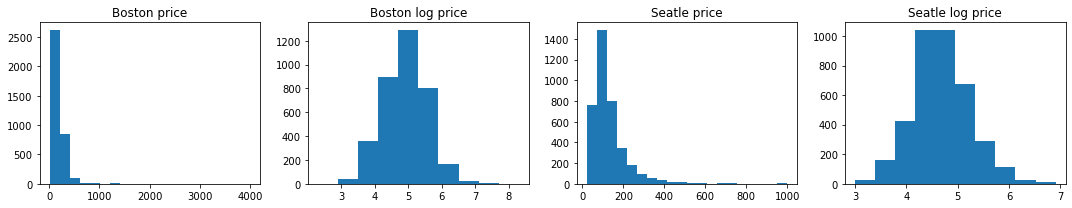

In [398]:
plt.figure(figsize=(15,3))
plt.subplot(1,4,1)
plt.hist(b_list_d['price'], bins = 20)
plt.title('Boston price')
plt.subplot(1,4,2)
plt.hist(np.log(b_list_d['price']))
plt.title('Boston log price')
plt.subplot(1,4,3)
plt.hist(s_list_d['price'], bins = 20)
plt.title('Seatle price')
plt.subplot(1,4,4)
plt.hist(np.log(s_list_d['price']))
plt.title('Seatle log price')

plt.tight_layout();

let's create a DataFrame with log price 

In [399]:
b_price = b_list_d.copy()
b_price['log_price'] = np.log(b_price['price'])
s_price = s_list_d.copy()
s_price['log_price'] = np.log(s_price['price'])

Check How amenities correlate with price 

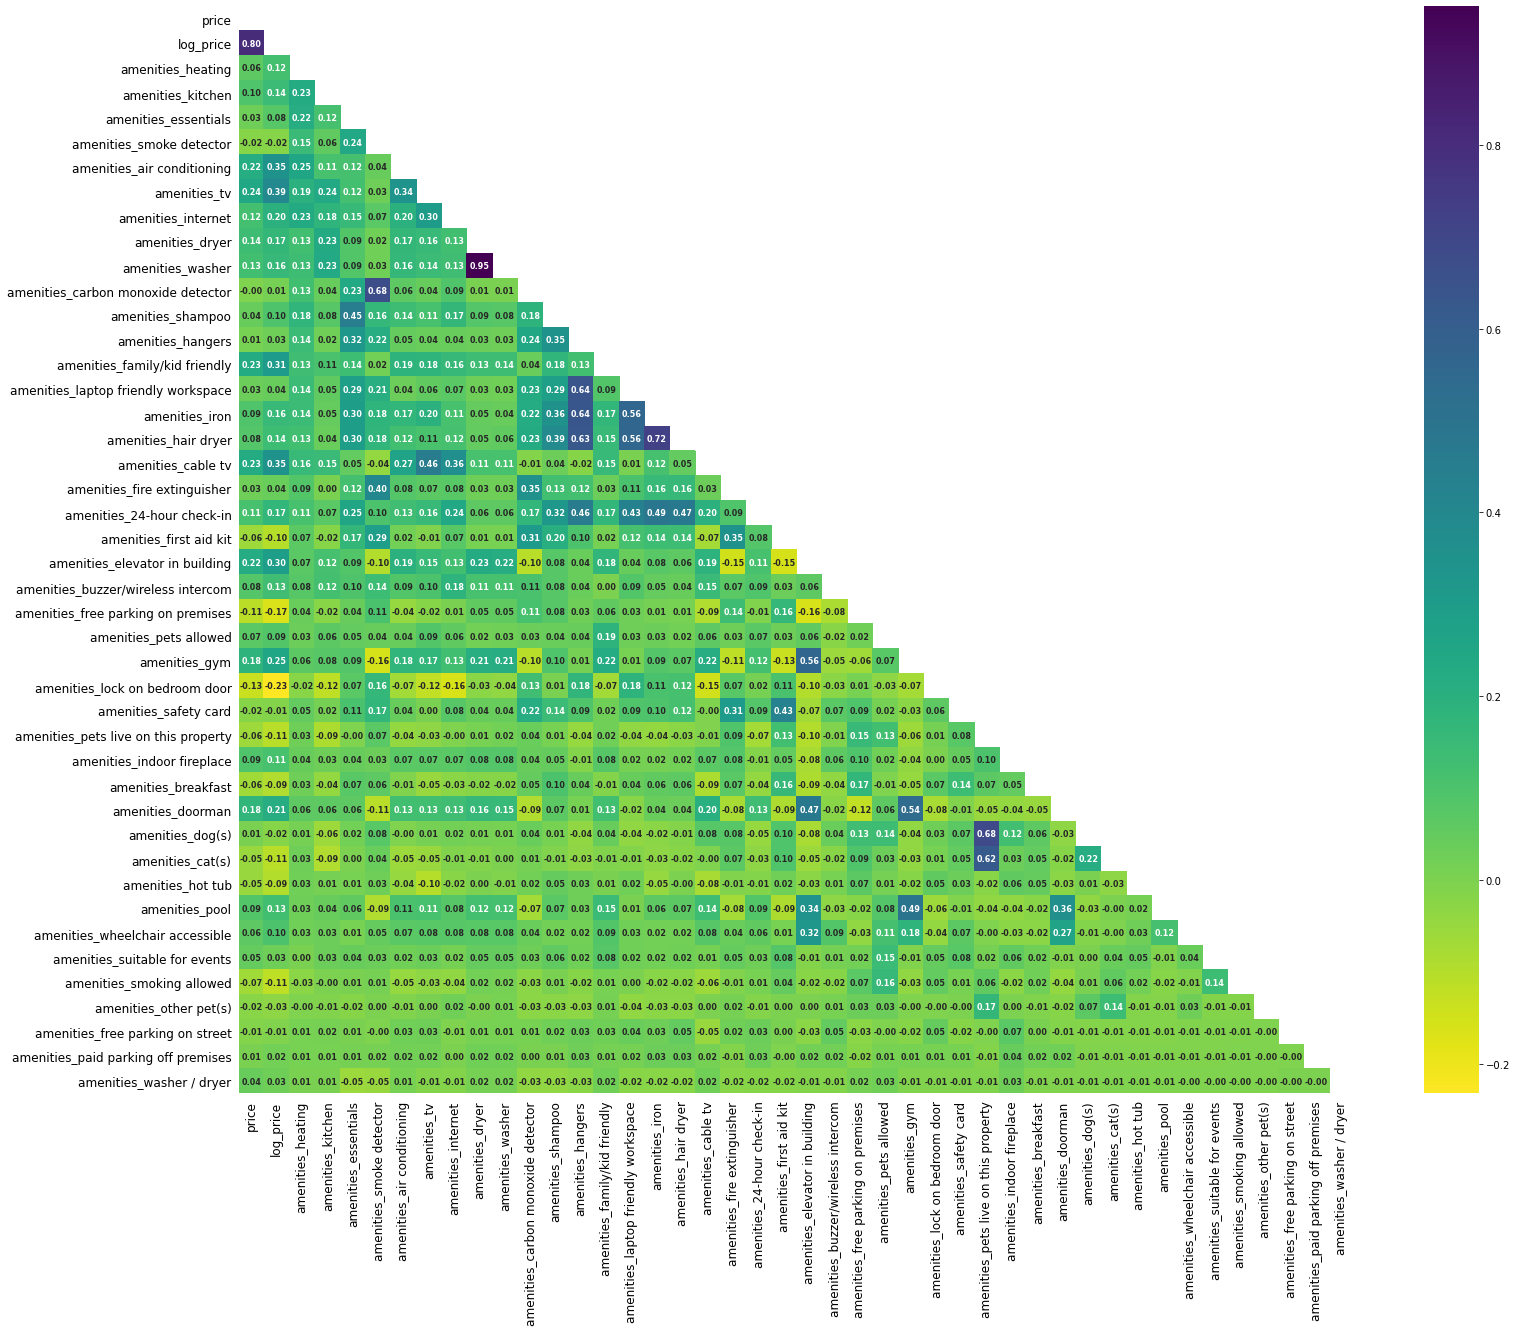

In [400]:
cols= [col for col in b_price.columns if 'amenities' in str(col)]
cols[0]='price'
cols[1]='log_price'
plt.figure(figsize = (25,20))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
mask = np.triu(np.ones_like(b_price[cols].corr()))
p = sns.heatmap(b_price[cols].corr(),mask = mask, annot_kws = {'fontsize':8, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False)

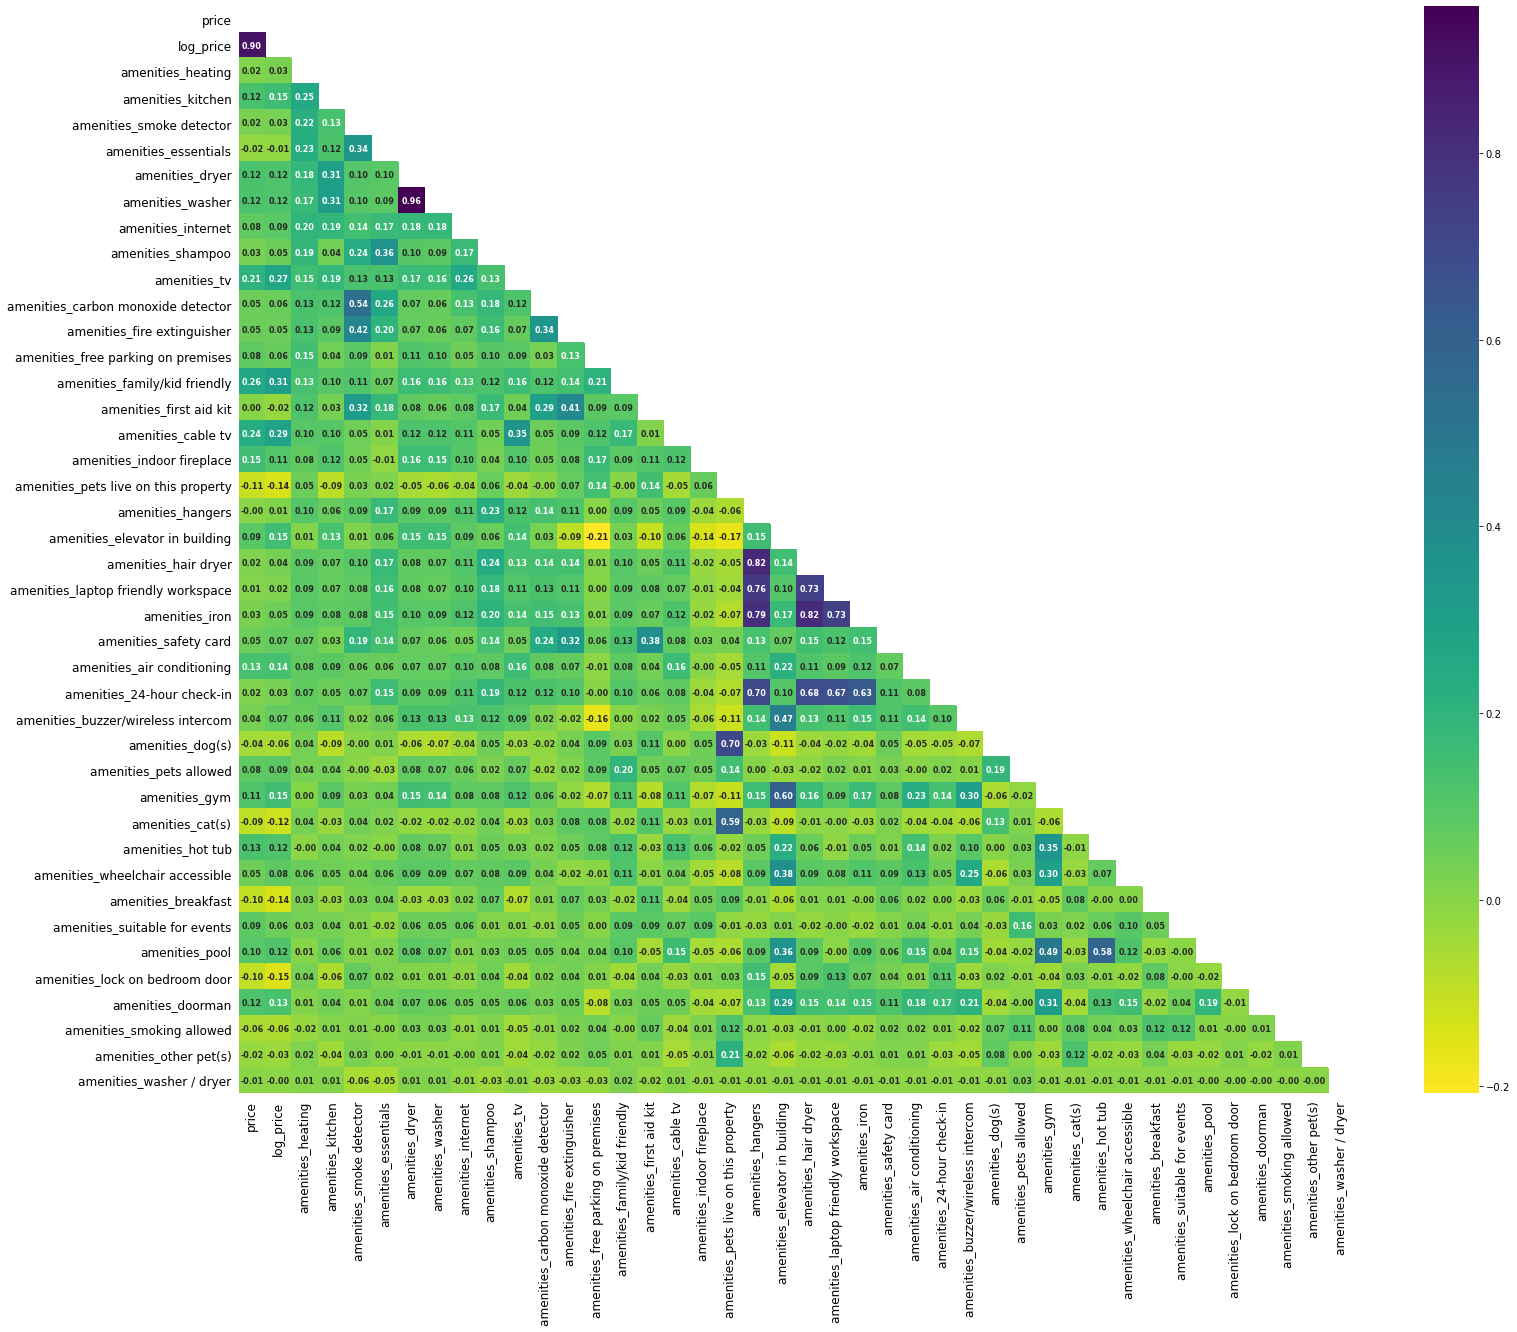

In [401]:
cols= [col for col in s_price.columns if 'amenities' in str(col)]
cols[0]='price'
cols[1]='log_price'
plt.figure(figsize = (25,20))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
mask = np.triu(np.ones_like(s_price[cols].corr()))
p = sns.heatmap(s_price[cols].corr(), mask = mask, annot_kws = {'fontsize':8, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False)

check how the rest of the numerical columns correlate with price

In [402]:
cols1 = ['price','log_price','host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_listings_count', 
'host_has_profile_pic', 'host_identity_verified','is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 
'beds','cleaning_fee', 'guests_included', 'extra_people','minimum_nights', 'availability_30', 'availability_60',
'availability_90', 'availability_365', 'number_of_reviews','review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
'review_scores_value', 'instant_bookable','require_guest_profile_picture', 'require_guest_phone_verification',
'calculated_host_listings_count', 'reviews_per_month', 'len_name','len_host_about', 'len_summary', 'len_description',
'len_neighborhood_overview', 'len_transit', 'count_amenities','count_host_verifications']

Wall time: 1.54 s


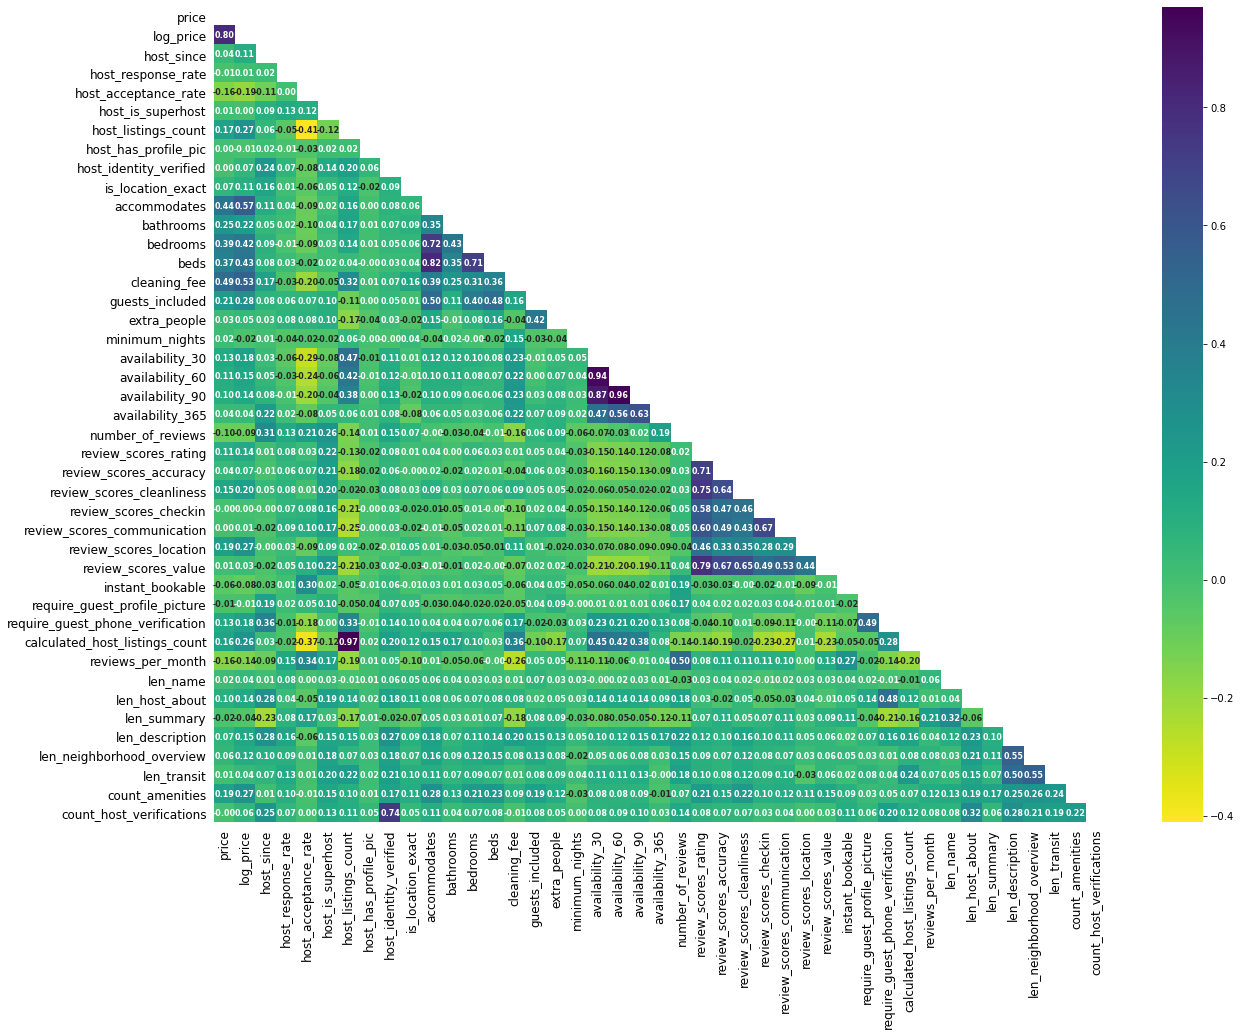

In [403]:
%%time
plt.figure(figsize = (20,15))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
mask = np.triu(np.ones_like(b_price[cols1].corr()))
p = sns.heatmap(b_price[cols1].corr(),mask = mask, annot_kws = {'fontsize':8, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False)

Wall time: 1.63 s


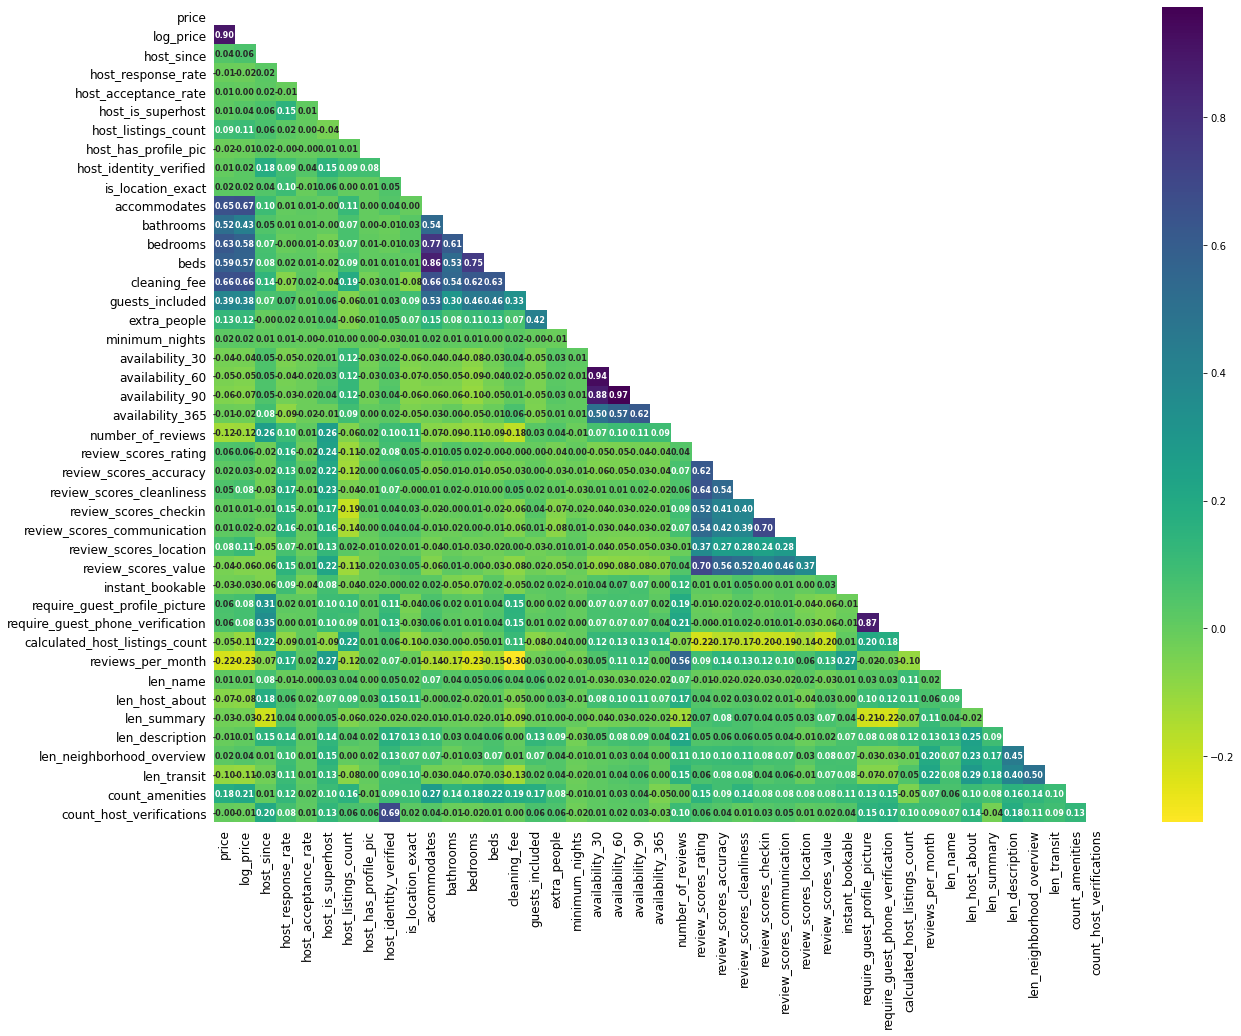

In [404]:
%%time
plt.figure(figsize = (20,15))
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
mask = np.triu(np.ones_like(s_price[cols1].corr()))
p = sns.heatmap(s_price[cols1].corr(),mask = mask, annot_kws = {'fontsize':8, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False)

Seems like  `accommodates`,`bathrooms`, `beds`, `cleaning fee`, `guests_included` correlates well with price, we can also add `extra people`, `reviews_per_month`, `count_amenities`, `revies_scores_location`, `len_host_about`, `calculated_host_listings_count`, `amenities_air conditioning`, `amenities_tv`, `amenities_family/kid friendly`, `amenities_elevator in building`, `amenities_gym`,`amenities_doorman`.

In [405]:
%%time
cols4 = ['log_price','price','accommodates','bathrooms','bedrooms','beds','cleaning_fee','guests_included',
'reviews_per_month', 'count_amenities', 'review_scores_location', 'host_listings_count',
'amenities_air conditioning','amenities_tv','amenities_family/kid friendly','amenities_elevator in building', 
'amenities_gym','amenities_doorman']

Wall time: 0 ns


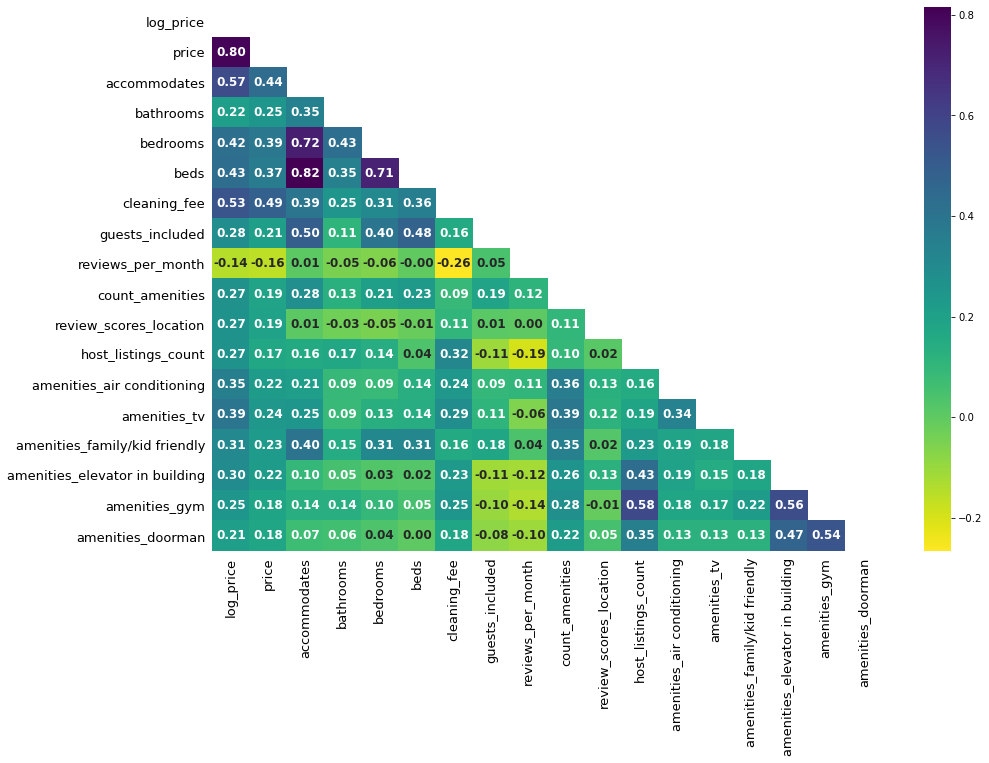

In [406]:
plt.figure(figsize = (15,10))
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
mask = np.triu(np.ones_like(b_price[cols4].corr()))
p = sns.heatmap(b_price[cols4].corr(),mask = mask, annot_kws = {'fontsize':12, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False);

Wall time: 426 ms


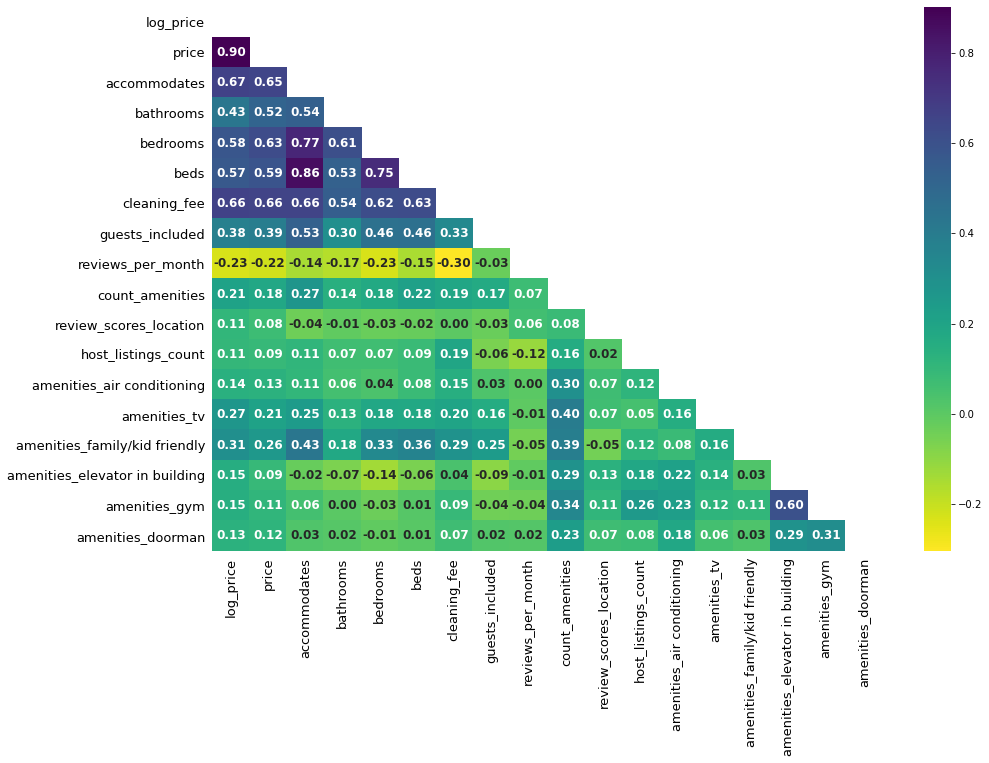

In [407]:
%%time
plt.figure(figsize = (15,10))
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
mask = np.triu(np.ones_like(s_price[cols4].corr()))
p = sns.heatmap(s_price[cols4].corr(),mask = mask, annot_kws = {'fontsize':12, 'fontweight': 'bold'},cmap = 'viridis_r', annot = True, fmt = '.2f');
p.tick_params(left=False, bottom=False)


 _______________________________________________________________________________________________________________________

### Task2: Data Preperation

<font size="3"> **To prepare the Data for a model that predicts price, let's start with dealing with the Null values in Numerical columns**</font>

In [408]:
display_side_by_side(b_price.select_dtypes(include = ['int64','float']).isnull().sum()[b_price.select_dtypes(include = ['int64','float']).isnull().sum()>0].reset_index().rename(columns = {'index':'columns', 0:'nulls'}),
s_price.select_dtypes(include = ['int64','float']).isnull().sum()[s_price.select_dtypes(include = ['int64','float']).isnull().sum()>0].reset_index().rename(columns = {'index':'columns', 0:'nulls'}),
titles = ['b_price Nulls', 's_price Nulls'])

,columns,nulls
0,host_response_rate,471
1,host_acceptance_rate,471
2,bathrooms,14
3,bedrooms,10
4,beds,9
5,cleaning_fee,1107
6,review_scores_rating,813
7,review_scores_accuracy,823
8,review_scores_cleanliness,818
9,review_scores_checkin,820


<font size="3"> **Let's review them case by case, resolve each, then dummify the cat. variables** </font> For`host_response_rate`,`host_acceptance_rate`,`review_scores_rating`,`review_scores_accuracy`,`review_scores_cleanliness` `review_scores_checkin`, `review_scores_communication`,`review_scores_location`,`review_scores_value`,`reviews_per_month`
we can impute using the mean.
As for `bathrooms`, `bedrooms` and `beds` we can impute using the median.
As for `cleaning_fee` we can impute using 0s  

In [409]:
cat_cols = list(b_price.select_dtypes(include= ['object']).isnull().columns)
mean_cols =['host_response_rate','host_acceptance_rate','review_scores_rating','review_scores_accuracy',
'review_scores_cleanliness' ,'review_scores_checkin', 'review_scores_communication','review_scores_location',
'review_scores_value','reviews_per_month']
median_cols=['bathrooms','bedrooms', 'beds', 'host_listings_count']
zero_cols=['cleaning_fee']
def clean_nums(df,mean_cols, median_cols, zero_cols):
    '''
    INPUT:
    df - pandas dataframe with numerical variables to be cleaned
    mean_cols - list of strings that are associated with names of columns to impute the mean
    median_cols - list of strings that are associated with names of columns to impute the median
    zero_cols - list of strings that are associated with names of columns to fill with zeros  
    
    OUTPUT:
    df - a  dataframe that has the no null values withing the numerical variables
    '''
    for col in mean_cols:
        try: 
            df[col]= df[col].fillna(df[col].mean())
        except:
            continue
    for col in median_cols:
        try:
            df[col]= df[col].fillna(df[col].median())
        except:
            continue
    for col in zero_cols:
        try:
            df[col]= df[col].fillna(0)
        except:
            continue
    
    return df 
def dummify(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    df_new = df.select_dtypes(include=['int64', 'float'])
    for col in cat_cols: 
        try:
            new_cols = pd.get_dummies(df[col], prefix = col, prefix_sep ='_', dummy_na = dummy_na)
            df_new = df_new.join(new_cols, how = 'left')
        except:
            continue
    return df_new

In [410]:
b_price = clean_nums(b_price, mean_cols, median_cols, zero_cols)
s_price = clean_nums(s_price, mean_cols, median_cols, zero_cols)
b_price = dummify(b_price, cat_cols, True)
s_price = dummify(s_price, cat_cols, True)

 _______________________________________________________________________________________________________________________

## Task3: Model

In [394]:
def clean_fit_linear_mod(df, response_col, dummy_na, test_size=.3, rand_state=42):

    #Split into explanatory and response variables
    X = df.drop([response_col,'log_price'], axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [395]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(b_price, 'price', dummy_na=False)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

NameError: name 'train_test_split' is not defined

In [ ]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(s_price, 'price', dummy_na=False)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

In [ ]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]      
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test